In [ ]:



MODELO DE PREDICCION BASANDONOS EN EL RECORD DE DATOS DE UN JUGADOR DE BASQUET, PARA ASI PREDECIR PUNTOS EN FUTUROS PARTIDOS 

Datos usados Resultado del partido, Estado final del partido, puntos hechos con 3PT, etc




In [62]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ruta del archivo CSV
csv_file_path = 'nba_juego_a_juego.csv'  # Cambia esto a la ruta correcta si es necesario

# Leer el archivo CSV
df = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del DataFrame
print("Las primeras filas del DataFrame son:")
print(df.head())

# Información general sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())

Las primeras filas del DataFrame son:
    Año      Fecha    OP    Resultado Estado MIN     FG   FG%    3PT   3P%  \
0  2021  Dom. 16/5   MEM  ['113-101']  ['G']  40  16-36  44.4   9-22  40.9   
1  2021  Mar. 11/5   PHX  ['122-116']  ['G']  37   7-22  31.8   1-11   9.1   
2  2021  Lun. 10/5  UTAH  ['119-116']  ['G']  37  11-25  44.0   3-13  23.1   
3  2021   Sáb. 8/5   OKC   ['136-97']  ['G']  29  14-26  53.8  11-21  52.4   
4  2021   Jue. 6/5   OKC   ['118-97']  ['G']  31  11-21  52.4   6-13  46.2   

      FT    FT%    R    A  BLK  STL   PF   TO   PTS  
0    5-6   83.3  7.0  9.0  1.0  1.0  2.0  7.0  46.0  
1    6-6  100.0  3.0  6.0  0.0  1.0  2.0  3.0  21.0  
2  11-12   91.7  4.0  6.0  0.0  2.0  1.0  3.0  36.0  
3  10-10  100.0  5.0  2.0  0.0  1.0  2.0  1.0  49.0  
4    6-7   85.7  4.0  7.0  0.0  1.0  2.0  3.0  34.0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtyp

In [63]:
# Función para asignar los puntos
def asignar_puntos(row):
    # Limpiar el resultado y separar los puntos
    resultado_limpio = row['Resultado'].strip("[]'TE ")  # Eliminar los corchetes y comillas
    row['Estado'] = row['Estado'].strip("[]'TE ")
    puntos = resultado_limpio.split('-')
    
    puntos1 = int(puntos[0])  # Puntos del equipo
    puntos2 = int(puntos[1])    # Puntos del rival
    if row['Estado'] == 'G':
        row['puntosEquipo'] = puntos1
        row['puntosRival'] = puntos2
    else:  # Perdido
        row['puntosEquipo'] = puntos2
        row['puntosRival'] = puntos1
    
    return row

# Función para asignar los puntos
def asignar_puntos_lanzamiento(row, lanzamiento):
    # Limpiar el resultado y separar los puntos
    puntos = row['FG'].split('-')
    
    puntos_anotados = int(puntos[0])  # Puntos del equipo
    puntos_intentados = int(puntos[1])    # Puntos del rival
    
    if lanzamiento == 'FG':
        row['FG_metidos'] = puntos_anotados
        row['FG_intentados'] = puntos_intentados
    elif lanzamiento == 'FT':
        row['FT_metidos'] = puntos_anotados
        row['FT_intentados'] = puntos_intentados
    else:
        row['3PT_metidos'] = puntos_anotados
        row['3PT_intentados'] = puntos_intentados
    
    return row

In [64]:
# Supongamos que ya tienes tu DataFrame llamado df
# Crea una lista con los meses en inglés y las palabras a eliminar
months_in_english = ["january", "february", "march", "april", "may", 
                     "june", "july", "august", "september", 
                     "october", "november", "december", 
                     "Promedios", "Totales"]

# Filtrar el DataFrame para eliminar las filas que contienen esos valores en la columna 'fecha'
df_filtered = df[~df['Fecha'].str.contains('|'.join(months_in_english), na=False)]

In [65]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['Fecha'])
#df = df.drop(columns=['FT','3PT','FG', 'Resultado', 'BLK', 'MIN','TO', 'A', 'PF', 'R', 'STL', 'MIN', 'FG%',  '3P%', 'FT%' ])
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar o imputar valores nulos si los hay
df = df.dropna()  # O puedes imputarlos con una media o mediana

Año           0
OP            0
Resultado     0
Estado        0
MIN           0
FG            0
FG%           0
3PT           0
3P%           0
FT            0
FT%           0
R             0
A             0
BLK          24
STL          24
PF           26
TO           26
PTS          26
dtype: int64


In [66]:
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,FT%,R,A,BLK,STL,PF,TO,PTS
0,2021,MEM,['113-101'],['G'],40,16-36,44.4,9-22,40.9,5-6,83.3,7.0,9.0,1.0,1.0,2.0,7.0,46.0
1,2021,PHX,['122-116'],['G'],37,7-22,31.8,1-11,9.1,6-6,100.0,3.0,6.0,0.0,1.0,2.0,3.0,21.0
2,2021,UTAH,['119-116'],['G'],37,11-25,44.0,3-13,23.1,11-12,91.7,4.0,6.0,0.0,2.0,1.0,3.0,36.0
3,2021,OKC,['136-97'],['G'],29,14-26,53.8,11-21,52.4,10-10,100.0,5.0,2.0,0.0,1.0,2.0,1.0,49.0
4,2021,OKC,['118-97'],['G'],31,11-21,52.4,6-13,46.2,6-7,85.7,4.0,7.0,0.0,1.0,2.0,3.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,PHX,['134-105'],['P'],30,7-17,41.2,4-9,44.4,3-5,60.0,7.0,8.0,0.0,1.0,1.0,1.0,21.0
203,2023,SAC,['130-125'],['G'],31,11-22,50.0,7-12,58.3,4-4,100.0,5.0,2.0,0.0,1.0,3.0,2.0,33.0
204,2023,DEN,['128-123'],['P'],36,10-22,45.5,5-11,45.5,9-9,100.0,5.0,4.0,0.0,0.0,2.0,3.0,34.0
205,2023,LAL,['123-109'],['G'],33,10-22,45.5,4-13,30.8,9-9,100.0,6.0,7.0,1.0,4.0,1.0,4.0,33.0


In [67]:
df['puntosEquipo'] = 0
df['puntosRival'] = 0
# Aplicar la función al DataFrame
df = df.apply(asignar_puntos, axis=1)
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FG')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= '3PT')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FT')

In [68]:
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,MEM,['113-101'],G,40,16-36,44.4,9-22,40.9,5-6,...,7.0,46.0,113,101,16,36,16,36,16,36
1,2021,PHX,['122-116'],G,37,7-22,31.8,1-11,9.1,6-6,...,3.0,21.0,122,116,7,22,7,22,7,22
2,2021,UTAH,['119-116'],G,37,11-25,44.0,3-13,23.1,11-12,...,3.0,36.0,119,116,11,25,11,25,11,25
3,2021,OKC,['136-97'],G,29,14-26,53.8,11-21,52.4,10-10,...,1.0,49.0,136,97,14,26,14,26,14,26
4,2021,OKC,['118-97'],G,31,11-21,52.4,6-13,46.2,6-7,...,3.0,34.0,118,97,11,21,11,21,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,PHX,['134-105'],P,30,7-17,41.2,4-9,44.4,3-5,...,1.0,21.0,105,134,7,17,7,17,7,17
203,2023,SAC,['130-125'],G,31,11-22,50.0,7-12,58.3,4-4,...,2.0,33.0,130,125,11,22,11,22,11,22
204,2023,DEN,['128-123'],P,36,10-22,45.5,5-11,45.5,9-9,...,3.0,34.0,123,128,10,22,10,22,10,22
205,2023,LAL,['123-109'],G,33,10-22,45.5,4-13,30.8,9-9,...,4.0,33.0,123,109,10,22,10,22,10,22


In [69]:
# Ejemplo de creación de nuevas características


df['OP'] = df['OP'].astype('category').cat.codes
df['Estado'] = df['Estado'].astype('category').cat.codes

#MOSTRAR ESTO
#df['FG%'] = (df['FG%'] / 100).round(2)  # Normalizar el porcentaje de tiros
#df['3P%'] = (df['3P%'] / 100).round(2)
#df['FT%'] = (df['FT%'] / 100).round(2)

# O puedes rellenar valores nulos con la media
#df = df.fillna(df.mean())

In [70]:
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,13,['113-101'],0,40,16-36,44.4,9-22,40.9,5-6,...,7.0,46.0,113,101,16,36,16,36,16,36
1,2021,22,['122-116'],0,37,7-22,31.8,1-11,9.1,6-6,...,3.0,21.0,122,116,7,22,7,22,7,22
2,2021,27,['119-116'],0,37,11-25,44.0,3-13,23.1,11-12,...,3.0,36.0,119,116,11,25,11,25,11,25
3,2021,19,['136-97'],0,29,14-26,53.8,11-21,52.4,10-10,...,1.0,49.0,136,97,14,26,14,26,14,26
4,2021,19,['118-97'],0,31,11-21,52.4,6-13,46.2,6-7,...,3.0,34.0,118,97,11,21,11,21,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,22,['134-105'],1,30,7-17,41.2,4-9,44.4,3-5,...,1.0,21.0,105,134,7,17,7,17,7,17
203,2023,25,['130-125'],0,31,11-22,50.0,7-12,58.3,4-4,...,2.0,33.0,130,125,11,22,11,22,11,22
204,2023,7,['128-123'],1,36,10-22,45.5,5-11,45.5,9-9,...,3.0,34.0,123,128,10,22,10,22,10,22
205,2023,12,['123-109'],0,33,10-22,45.5,4-13,30.8,9-9,...,4.0,33.0,123,109,10,22,10,22,10,22


In [86]:
#df.info()
#print(df[['FG_metidos', '3PT_metidos', 'FT_metidos']].head(10))
#df = df.drop(columns=['Resultado'])

# Eliminar las columnas originales que ya están separadas
df = df.drop(['FG', '3PT', 'FT'], axis=1)
df


,Año,OP,Estado,MIN,FG%,3P%,FT%,R,A,BLK,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,13,0,40,44.4,40.9,83.3,7.0,9.0,1.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
1,2021,22,0,37,31.8,9.1,100.0,3.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
2,2021,27,0,37,44.0,23.1,91.7,4.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
3,2021,19,0,29,53.8,52.4,100.0,5.0,2.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
4,2021,19,0,31,52.4,46.2,85.7,4.0,7.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,22,1,30,41.2,44.4,60.0,7.0,8.0,0.0,...,116.9,28.7,9.8,9.8,9.8,19.7,19.7,19.7,119.0,115.9
203,2023,25,0,31,50.0,58.3,100.0,5.0,2.0,0.0,...,119.9,29.4,10.0,10.0,10.0,20.1,20.1,20.1,118.4,116.4
204,2023,7,1,36,45.5,45.5,100.0,5.0,4.0,0.0,...,120.5,29.8,10.1,10.1,10.1,20.1,20.1,20.1,118.8,116.5
205,2023,12,0,33,45.5,30.8,100.0,6.0,7.0,1.0,...,121.3,29.6,10.0,10.0,10.0,20.2,20.2,20.2,119.0,115.8


In [87]:

# Ahora puedes proceder a los cálculos de los promedios sin problemas
for n in [5, 10, 25]:
    df[f'Avg_Points_Last_{n}'] = df['PTS'].rolling(window=n).mean()
    df[f'Avg_FT_Met_Last_{n}'] = df['FT_metidos'].rolling(window=n).mean()
    df[f'Avg_3PT_Met_Last_{n}'] = df['3PT_metidos'].rolling(window=n).mean()
    df[f'Avg_FG_Met_Last_{n}'] = df['FG_metidos'].rolling(window=n).mean()
    df[f'Avg_FT_Int_Last_{n}'] = df['FT_intentados'].rolling(window=n).mean()
    df[f'Avg_3PT_Int_Last_{n}'] = df['3PT_intentados'].rolling(window=n).mean()
    df[f'Avg_FG_Int_Last_{n}'] = df['FG_intentados'].rolling(window=n).mean()
    df[f'Avg_punt_equipo_Last_{n}'] = df['puntosEquipo'].rolling(window=n).mean()
    df[f'Avg_punt_rival_Last_{n}'] = df['puntosRival'].rolling(window=n).mean()

# Eliminar las columnas originales que ya no necesitamos
df = df.drop(columns=['FG_intentados', 'FT_intentados', '3PT_intentados', 'FG_metidos', 'FT_metidos', '3PT_metidos'])

# Rellenar los NaN resultantes del rolling con la media de cada columna
df = df.fillna(df.mean()).round(1)


<class 'KeyError'>: 'FT_metidos'

In [98]:
# Filtrar solo las columnas numéricas para calcular las medias
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Rellenar los NaN solo en las columnas numéricas con su media
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Ahora redondear los valores numéricos a un decimal
df[numerical_cols] = df[numerical_cols].round(1)

df

,Año,OP,Estado,MIN,FG%,3P%,FT%,R,A,BLK,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,13,0,40,44.4,40.9,83.3,7.0,9.0,1.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
1,2021,22,0,37,31.8,9.1,100.0,3.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
2,2021,27,0,37,44.0,23.1,91.7,4.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
3,2021,19,0,29,53.8,52.4,100.0,5.0,2.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
4,2021,19,0,31,52.4,46.2,85.7,4.0,7.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,22,1,30,41.2,44.4,60.0,7.0,8.0,0.0,...,116.9,28.7,9.8,9.8,9.8,19.7,19.7,19.7,119.0,115.9
203,2023,25,0,31,50.0,58.3,100.0,5.0,2.0,0.0,...,119.9,29.4,10.0,10.0,10.0,20.1,20.1,20.1,118.4,116.4
204,2023,7,1,36,45.5,45.5,100.0,5.0,4.0,0.0,...,120.5,29.8,10.1,10.1,10.1,20.1,20.1,20.1,118.8,116.5
205,2023,12,0,33,45.5,30.8,100.0,6.0,7.0,1.0,...,121.3,29.6,10.0,10.0,10.0,20.2,20.2,20.2,119.0,115.8


In [89]:
# Variables predictoras (features)
# Seleccionar todas las columnas excepto 'PTS'
X = df.loc[:, df.columns != 'PTS']

# Variable objetivo (target)
y = df['PTS']

In [90]:
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [92]:
df

,Año,OP,Estado,MIN,FG%,3P%,FT%,R,A,BLK,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,13,0,40,44.4,40.9,83.3,7.0,9.0,1.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
1,2021,22,0,37,31.8,9.1,100.0,3.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
2,2021,27,0,37,44.0,23.1,91.7,4.0,6.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
3,2021,19,0,29,53.8,52.4,100.0,5.0,2.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
4,2021,19,0,31,52.4,46.2,85.7,4.0,7.0,0.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,22,1,30,41.2,44.4,60.0,7.0,8.0,0.0,...,116.9,28.7,9.8,9.8,9.8,19.7,19.7,19.7,119.0,115.9
203,2023,25,0,31,50.0,58.3,100.0,5.0,2.0,0.0,...,119.9,29.4,10.0,10.0,10.0,20.1,20.1,20.1,118.4,116.4
204,2023,7,1,36,45.5,45.5,100.0,5.0,4.0,0.0,...,120.5,29.8,10.1,10.1,10.1,20.1,20.1,20.1,118.8,116.5
205,2023,12,0,33,45.5,30.8,100.0,6.0,7.0,1.0,...,121.3,29.6,10.0,10.0,10.0,20.2,20.2,20.2,119.0,115.8


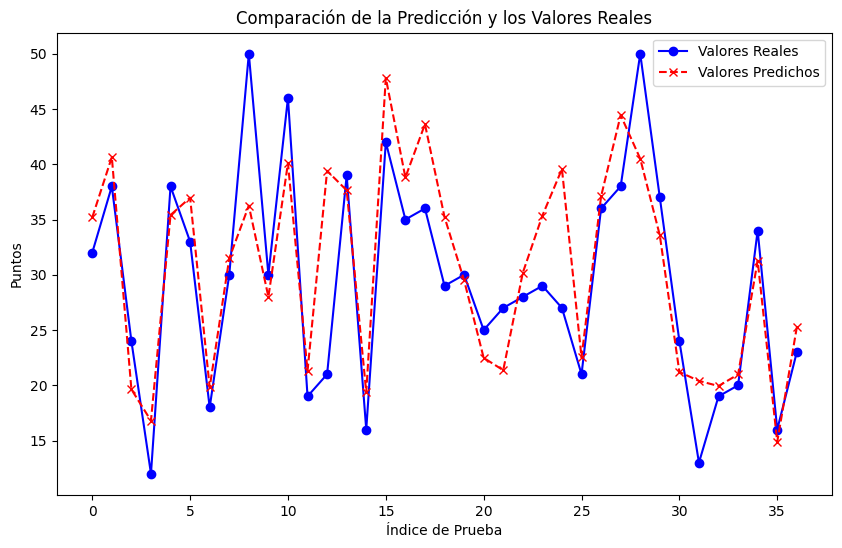

In [93]:
# Predicción
y_pred = model.predict(X_test)

# Gráfico de comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test.values, label='Valores Reales', color='b', marker='o')

# Graficar los valores predichos
plt.plot(y_pred, label='Valores Predichos', color='r', linestyle='--', marker='x')

# Añadir título y etiquetas
plt.title('Comparación de la Predicción y los Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Puntos')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [94]:
# Evaluación
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 34.69477218987541
R2 Score: 0.628353678910037


In [95]:
# Crear un DataFrame con los valores reales, predichos y la diferencia
resultados_df = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred,
    'Diferencia': y_test - y_pred
})

# Mostrar las primeras filas del DataFrame
print(resultados_df.head(20))

     Valor Real  Valor Predicho  Diferencia
19         32.0       35.189683   -3.189683
45         38.0       40.644120   -2.644120
176        24.0       19.629690    4.370310
124        12.0       16.800578   -4.800578
168        38.0       35.405913    2.594087
15         33.0       36.973003   -3.973003
25         18.0       19.821156   -1.821156
76         30.0       31.480155   -1.480155
130        50.0       36.259230   13.740770
110        30.0       28.001041    1.998959
109        46.0       40.105203    5.894797
183        19.0       21.300875   -2.300875
77         21.0       39.406915  -18.406915
196        39.0       37.640021    1.359979
49         16.0       19.373744   -3.373744
16         42.0       47.803767   -5.803767
55         35.0       38.810650   -3.810650
38         36.0       43.622859   -7.622859
93         29.0       35.221614   -6.221614
60         30.0       29.506476    0.493524


In [97]:
# Obtener los coeficientes de las variables
coeficientes = model.coef_

# Mostrar las columnas con sus respectivos coeficientes
variables_influencia = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar las variables por la magnitud de su coeficiente
variables_influencia = variables_influencia.reindex(variables_influencia.Coeficiente.abs().sort_values(ascending=False).index)
variables_influencia_avg = variables_influencia[variables_influencia['Variable'].str.contains('Avg')]

# Mostrar las variables "Avg" con sus coeficientes
print(variables_influencia_avg)
# Mostrar las variables con mayor influencia


                   Variable  Coeficiente
33       Avg_Points_Last_25    -1.003857
36       Avg_FG_Met_Last_25     0.657531
35      Avg_3PT_Met_Last_25     0.657531
34       Avg_FT_Met_Last_25     0.657531
27       Avg_FG_Met_Last_10    -0.482861
26      Avg_3PT_Met_Last_10    -0.482861
25       Avg_FT_Met_Last_10    -0.482861
40  Avg_punt_equipo_Last_25     0.478025
24       Avg_Points_Last_10     0.474513
31  Avg_punt_equipo_Last_10    -0.342018
20       Avg_3PT_Int_Last_5     0.224579
21        Avg_FG_Int_Last_5     0.224579
19        Avg_FT_Int_Last_5     0.224579
39       Avg_FG_Int_Last_25     0.184113
38      Avg_3PT_Int_Last_25     0.184113
37       Avg_FT_Int_Last_25     0.184113
18        Avg_FG_Met_Last_5     0.178876
17       Avg_3PT_Met_Last_5     0.178876
16        Avg_FT_Met_Last_5     0.178876
32   Avg_punt_rival_Last_10    -0.090186
30       Avg_FG_Int_Last_10     0.068448
29      Avg_3PT_Int_Last_10     0.068448
28       Avg_FT_Int_Last_10     0.068448
41   Avg_punt_ri